In [10]:
import rasterio
from rasterio.plot import show
import os
import sys
from rasterio.mask import mask

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [4]:
root_fp = "/nfs/a319/gy17m2a/PhD/"
# os.chdir(root_fp)

# Create path to files containing functions
sys.path.insert(0, root_fp + 'Scripts/GlobalFunctions')
from PDF_plotting_functions import *
# sys.path.insert(0, root_fp + 'Scripts/Regridding')
# from Regridding_functions import *
sys.path.insert(0, root_fp + 'Scripts/GlobalFunctions')
from Spatial_geometry_functions import *

# Define ensemble member numbers
ems = ['01', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '15']
# Define time period
timeperiod = 'Baseline'
# define whether to trim to JJA
jja_status = 'jja'

In [5]:
leeds_at_centre_gdf = create_leeds_at_centre_outline({'init' :'epsg:27700'})
leeds_at_centre_gdf

,geometry
0,"POLYGON ((391061.670 470497.324, 472261.556 47..."


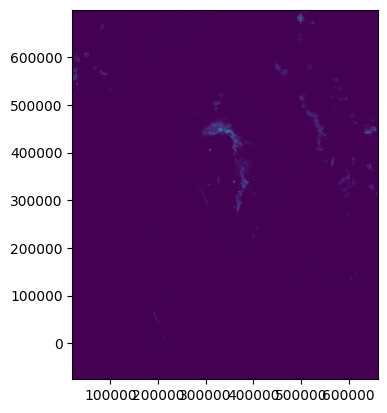

<Axes: >

In [6]:
fp = r"../../../datadir/NimRod_Processed/2004/metoffice-c-band-rain-radar_uk_20040406_1km-composite.tiff"
img = rasterio.open(fp)
show(img)

In [14]:
print(img.count)
print(img.height, img.width)
print(img.crs)

1
775 640
EPSG:27700


In [11]:
with rasterio.open(fp) as src:
    catchment_gdf=leeds_at_centre_gdf.to_crs(src.crs)
    out_image, out_transform=mask(src,leeds_at_centre_gdf.geometry,crop=True)
    out_meta=src.meta.copy() # copy the metadata of the source DEM

In [24]:
out_image[0].shape

(73, 83)

In [ ]:
def save_clipped_to_gdf(input_fp catchment_gdf, output_fp):
    with rasterio.open(input_fp) as src:
        catchment_gdf=catchment_gdf.to_crs(src.crs)
        # print(Vector.crs)
        out_image, out_transform=mask(src,catchment_gdf.geometry,crop=True)
        out_meta=src.meta.copy() # copy the metadata of the source DEM

    out_meta.update({"driver":"Gtiff", "height":out_image.shape[1], # height starts with shape[1]
        "width":out_image.shape[2], # width starts with shape[2]
        "transform":out_transform
    })

    with rasterio.open(fp,'w',**out_meta) as dst:
        dst.write(out_image)

(775, 640)